In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [70]:
df=pd.read_csv("Weather Data.csv")
df.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  2/1/2008     19.5     22.4      15.6          6.2       0.0           W   
1  2/2/2008     19.5     25.6       6.0          3.4       2.7           W   
2  2/3/2008     21.6     24.5       6.6          2.4       0.1           W   
3  2/4/2008     20.2     22.8      18.8          2.2       0.0           W   
4  2/5/2008     19.7     25.7      77.4          4.8       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0             41          S        SSW  ...           92           84   
1             41          W          E  ...           83           73   
2             41        ESE        ESE  ...           88           86   
3             41        NNE          E  ...           83           90   
4             41        NNE          W  ...           88           74   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1017.6       1017.4         8         8     20.7     20.9        Yes   
1       1017.9       1016.4         7         7     22.4     24.8        Yes   
2       1016.7       1015.6         7         8     23.5     23.0        Yes   
3       1014.2       1011.8         8         8     21.4     20.9        Yes   
4       1008.3       1004.8         8         8     22.5     25.5        Yes   

   RainTomorrow  
0           Yes  
1           Yes  
2           Yes  
3           Yes  
4           Yes  

[5 rows x 22 columns]

In [71]:
df.drop('Date', axis=1, inplace=True)

In [72]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
WindDir3pm        object
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [73]:
df.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

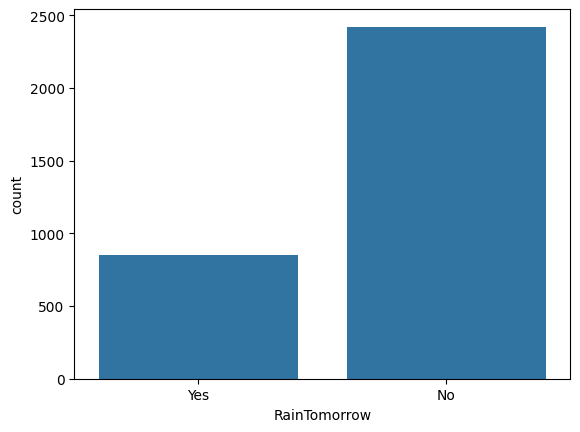

In [74]:
sns.countplot(x=df['RainTomorrow'])

In [75]:
num_cols=[feature for feature in df.columns if df[feature].dtype!='object']
cat_cols=[feature for feature in df.columns if df[feature].dtype=='object']

<Axes: >

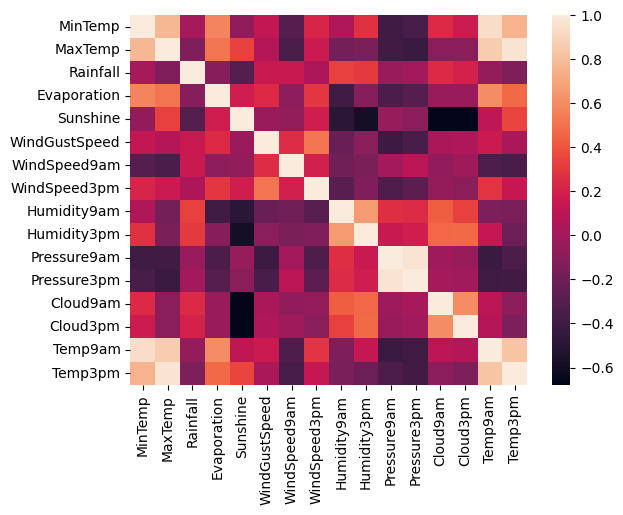

In [76]:
sns.heatmap(df[num_cols].corr())
    

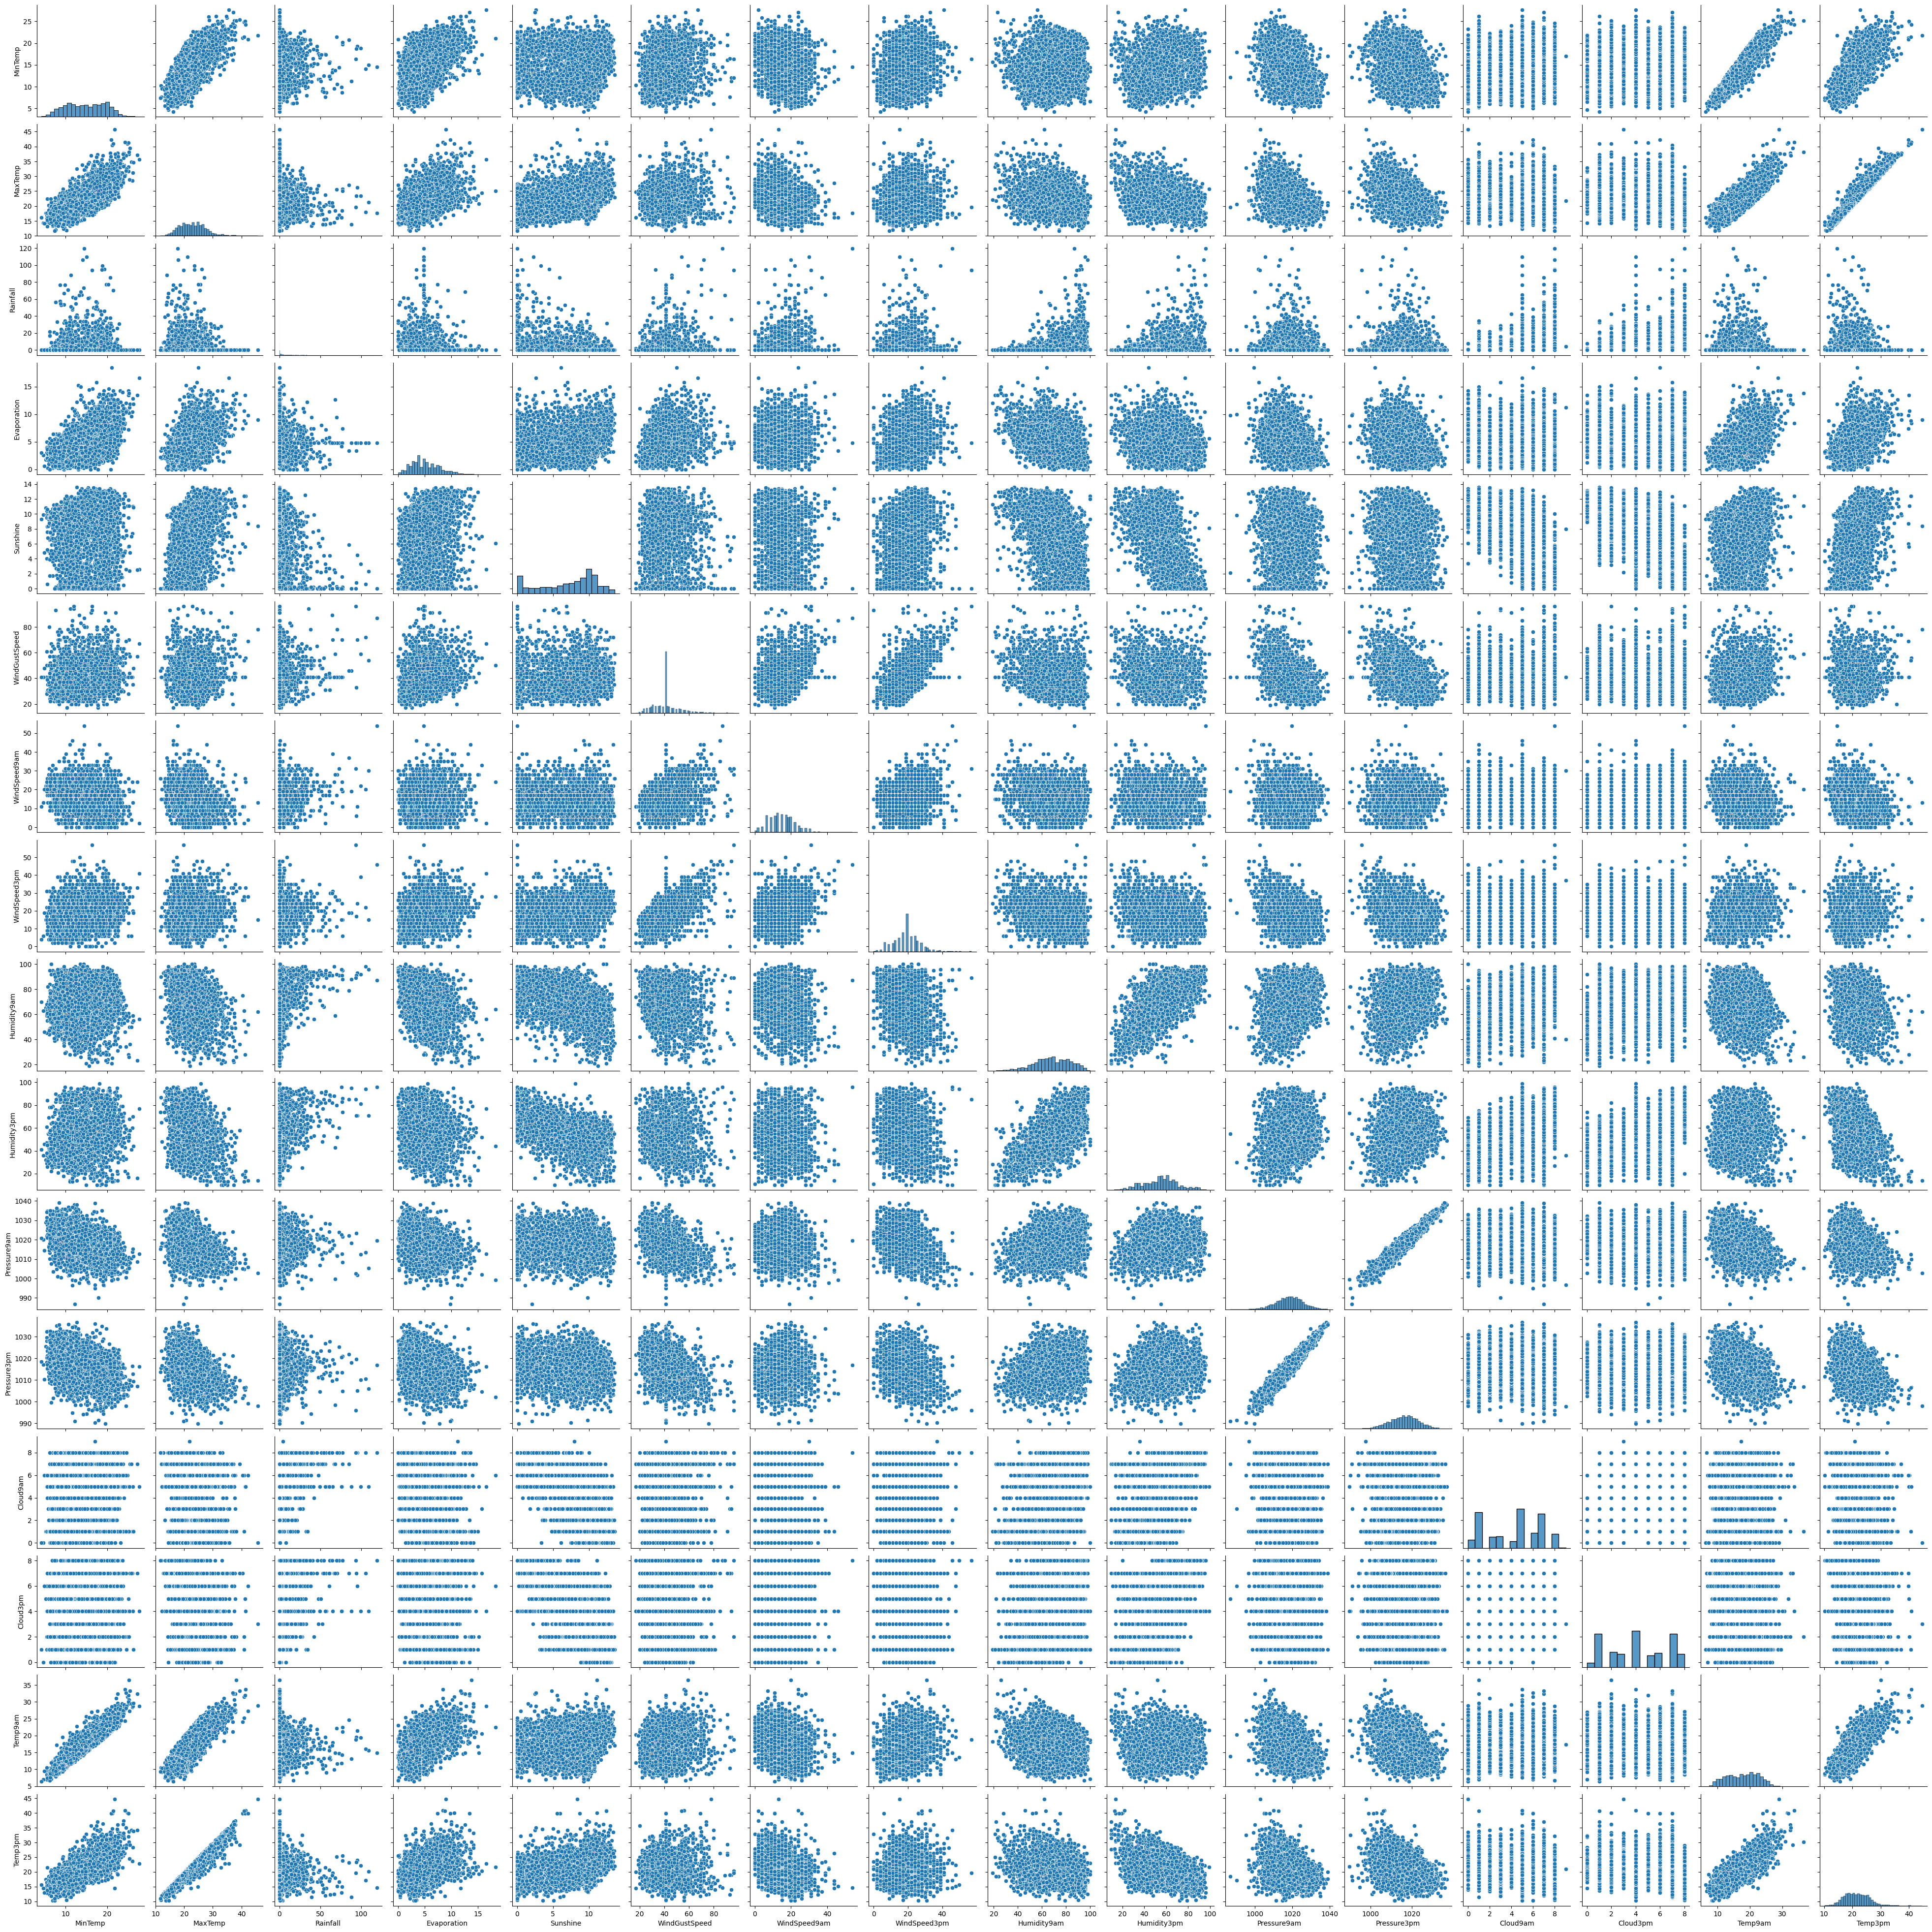

In [77]:
sns.pairplot(data=df)

In [78]:
cat_cols

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [79]:
for i in cat_cols:
    print(f"{df[i].unique()}")
cat_cols

['W' 'NNW' 'WNW' 'ENE' 'NNE' 'NW' 'SSE' 'NE' 'ESE' 'WSW' 'SE' 'SW' 'N' 'E'
 'SSW' 'S']
['S' 'W' 'ESE' 'NNE' 'SSW' 'WNW' 'N' 'SW' 'SE' 'SSE' 'WSW' 'E' 'ENE' 'NW'
 'NNW' 'NE']
['SSW' 'E' 'ESE' 'W' 'ENE' 'S' 'SE' 'SSE' 'NE' 'NNE' 'NNW' 'NW' 'WNW' 'N'
 'WSW' 'SW']
['Yes' 'No']
['Yes' 'No']


['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [80]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
df['WindGustDir']=le1.fit_transform(df['WindGustDir'])
df['WindDir9am']=le2.fit_transform(df['WindDir9am'])
df['WindDir3pm']=le3.fit_transform(df['WindDir3pm'])
df['RainToday']=le4.fit_transform(df['RainTomorrow'])
df['RainTomorrow']=le5.fit_transform(df['RainTomorrow'])

In [81]:
df['RainToday'].value_counts()

RainToday
0    2422
1     849
Name: count, dtype: int64

In [82]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

<Axes: xlabel='MaxTemp'>

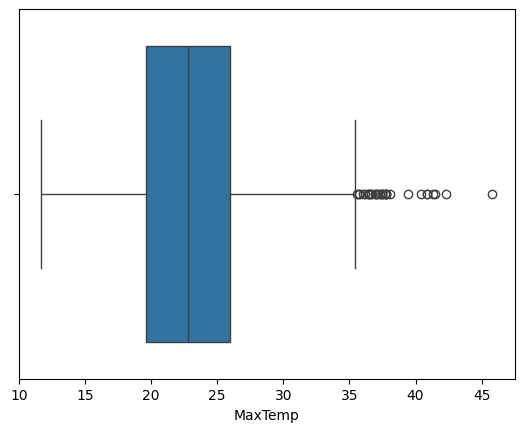

In [83]:
sns.boxplot(data=df, x='MaxTemp')

<Axes: xlabel='Rainfall'>

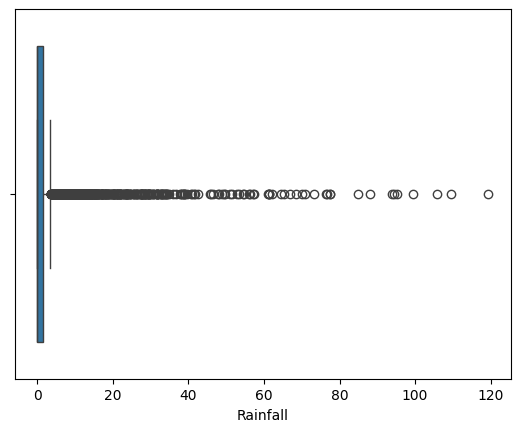

In [84]:
sns.boxplot(data=df, x='Rainfall')

(array([2.996e+03, 1.470e+02, 6.900e+01, 1.900e+01, 1.500e+01, 1.100e+01,
        5.000e+00, 5.000e+00, 2.000e+00, 2.000e+00]),
 array([  0.  ,  11.94,  23.88,  35.82,  47.76,  59.7 ,  71.64,  83.58,
         95.52, 107.46, 119.4 ]),
 <BarContainer object of 10 artists>)

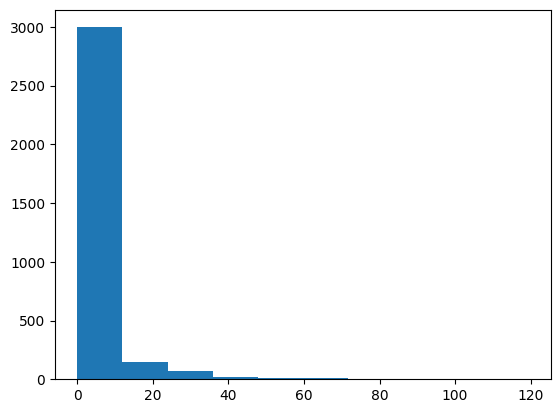

In [85]:
plt.hist(x=df['Rainfall'])

In [86]:
df['RainTomorrow'].value_counts()

RainTomorrow
0    2422
1     849
Name: count, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

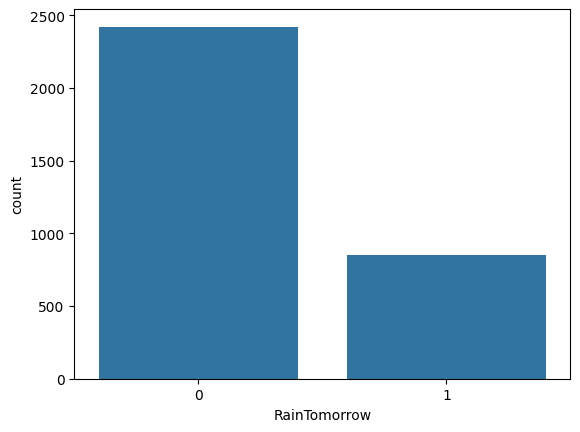

In [87]:
sns.countplot(data=df, x=df['RainTomorrow'])

In [88]:
from sklearn.utils import resample
df_majority=df[(df['RainTomorrow']==0)]
df_minority=df[(df['RainTomorrow']==1)]
df_minority_upsampled=resample(df_minority, replace=True, n_samples=2422)
df_upsampled=pd.concat([df_minority_upsampled, df_majority])
df_upsampled

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
2120     13.4     21.9       4.2          3.4       3.5           10   
2238      8.1     14.4       0.0          3.4       4.5           10   
3100     19.6     24.3       5.0          6.0       0.5            1   
3183     21.4     28.8       0.0          2.4       8.4            0   
1674     20.7     27.2       0.0          9.4       2.9           15   
...       ...      ...       ...          ...       ...          ...   
3266      8.6     19.6       0.0          2.0       7.8           10   
3267      9.3     19.2       0.0          2.0       9.2           13   
3268      9.4     17.7       0.0          2.4       2.7           13   
3269     10.1     19.3       0.0          1.4       9.3           13   
3270      7.6     19.3       0.0          3.4       9.4           13   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
2120             50          13           8            22  ...           58   
2238             48          13           8            15  ...           62   
3100             30           5           0             7  ...           89   
3183             30           0           0             2  ...           84   
1674             41           8           2             7  ...           74   
...             ...         ...         ...           ...  ...          ...   
3266             37          13          10            22  ...           73   
3267             30          13           2            20  ...           78   
3268             24          14           3            15  ...           85   
3269             43          13          13            17  ...           56   
3270             35          13          13            13  ...           73   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2120           64       1020.7       1018.4         7         8     17.3   
2238           45       1025.4       1025.1         7         5     10.3   
3100           69       1019.0       1017.2         8         7     20.5   
3183           71       1012.3       1007.4         8         1     22.5   
1674           69       1015.9       1012.3         8         7     22.5   
...           ...          ...          ...       ...       ...      ...   
3266           52       1025.9       1025.3         2         2     10.5   
3267           53       1028.5       1024.6         2         2     11.0   
3268           56       1020.8       1015.0         6         6     10.2   
3269           35       1017.3       1015.1         5         2     12.4   
3270           32       1018.6       1015.4         1         1      9.4   

      Temp3pm  RainToday  RainTomorrow  
2120     20.8          1             1  
2238     13.7          1             1  
3100     22.6          1             1  
3183     27.0          1             1  
1674     24.1          1             1  
...       ...        ...           ...  
3266     17.9          0             0  
3267     18.7          0             0  
3268     17.3          0             0  
3269     19.0          0             0  
3270     18.8          0             0  

[4844 rows x 21 columns]

In [89]:
df_upsampled['RainTomorrow'].value_counts()

RainTomorrow
1    2422
0    2422
Name: count, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

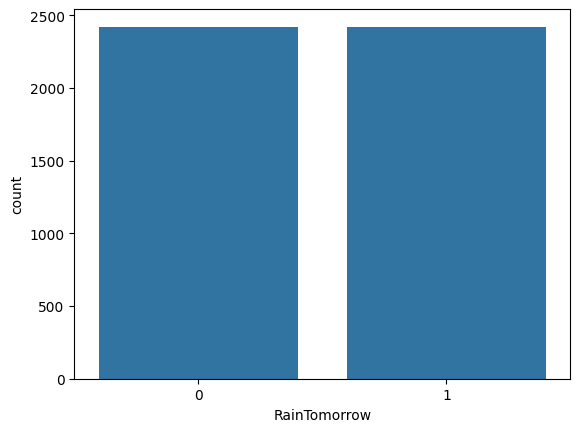

In [113]:
sns.countplot(x=df_upsampled['RainTomorrow'])

In [97]:
import scipy.stats as stats
z=np.abs(stats.zscore(df_upsampled))
df_clean=df_upsampled[(z<3).all(axis=1)]
df_clean.shape

(4560, 21)

<Axes: >

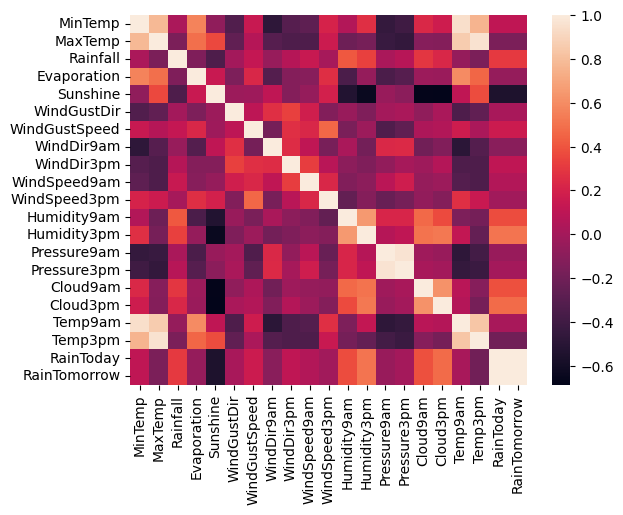

In [98]:
sns.heatmap(df_clean.corr())

Train Test Split

In [99]:
X = df_clean.drop('RainTomorrow', axis=1)
y = df_clean['RainTomorrow']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train, y_train)
y_pred_reg=reg.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score=accuracy_score(y_pred_reg, y_test)
print(score)
print(classification_report(y_pred_reg, y_test))
print(confusion_matrix(y_pred_reg, y_test))

0.7960526315789473
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       488
           1       0.76      0.82      0.79       424

    accuracy                           0.80       912
   macro avg       0.80      0.80      0.80       912
weighted avg       0.80      0.80      0.80       912

[[379 109]
 [ 77 347]]


Decision Tree Classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
y_pred_dtree=dtree.predict(X_test)
score=accuracy_score(y_test, y_pred_dtree)
print(score)
print(classification_report(y_test, y_pred_dtree))
print(confusion_matrix(y_test, y_pred_dtree))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       456

    accuracy                           1.00       912
   macro avg       1.00      1.00      1.00       912
weighted avg       1.00      1.00      1.00       912

[[456   0]
 [  0 456]]


Support Vector Classifier

In [109]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred_svc=svc.predict(X_test)
score=accuracy_score(y_test, y_pred_svc)
print(score)
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

0.7478070175438597
              precision    recall  f1-score   support

           0       0.72      0.82      0.76       456
           1       0.79      0.68      0.73       456

    accuracy                           0.75       912
   macro avg       0.75      0.75      0.75       912
weighted avg       0.75      0.75      0.75       912

[[372  84]
 [146 310]]


Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
rdc=RandomForestClassifier()
rdc.fit(X_train, y_train)
y_pred_rdc=rdc.predict(X_test)
score=accuracy_score(y_test, y_pred_rdc)
print(score)
print(classification_report(y_test, y_pred_rdc))
print(confusion_matrix(y_test, y_pred_rdc))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       456

    accuracy                           1.00       912
   macro avg       1.00      1.00      1.00       912
weighted avg       1.00      1.00      1.00       912

[[456   0]
 [  0 456]]
